In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# https://qiita.com/taiyaki8926/items/6720a1c19e9c9afbfd12 より

def legendre_symbol(n, p):
    ls = pow(n, (p - 1) // 2, p)
    if ls == 1:
        return 1
    elif ls == p - 1:
        return -1
    else:
        return 0
        # # in case ls == 0
        # raise Exception('n:{} = 0 mod p:{}'.format(n, p))

def check_sqrt(x, n, p):
    assert(pow(x, 2, p) == n % p)

def modular_sqrt(n:int, p:int) -> list:
    if type(n) != int or type(p) != int:
        raise TypeError('n and p must be integers')

    if p < 3:
        raise Exception('p must be equal to or more than 3')

    # if not isPrime(p):
    #     raise Exception('p must be a prime number. {} is a composite number'.format(p))

    if legendre_symbol(n, p) == -1:
        raise Exception('n={} is Quadratic Nonresidue modulo p={}'.format(n, p))

    if p % 4 == 3:
        x = pow(n, (p + 1) // 4, p)
        check_sqrt(x, n, p)
        return x, p - x
    
    # Tonelli-Shanks
    q, s = p - 1, 0
    while q % 2 == 0:
        q //= 2
        s += 1
    z = 2
    while legendre_symbol(z, p) != -1:
        z += 1
    m, c, t, r = s, pow(z, q, p), pow(n, q, p), pow(n, (q + 1) // 2, p)
    while t != 1:
        pow_t = pow(t, 2, p)
        for j in range(1, m):
            if pow_t == 1:
                m_update = j
                break
            pow_t = pow(pow_t, 2, p)
        b = pow(c, int(pow(2, m - m_update - 1)), p)
        m, c, t, r = m_update, pow(b, 2, p), t * pow(b, 2, p) % p, r * b % p
    check_sqrt(r, n, p)
    return [r, p - r]

# print(modular_sqrt(5, 41))
# => [28, 13]

In [22]:
"""
E : y**2 = x**3 + a*x + b (mod p)
"""
def find_points(a, b, p):
    points = []
    for x in range(p):
        z = (x**3 + a * x + b) % p
        if legendre_symbol(z, p) == 1:
            y1, y2 = modular_sqrt(z, p)
            points.append((x, y1))
            points.append((x, y2))
        elif legendre_symbol == 0:
            points.append((x, 0))
    return points

[(2, 33), (2, 4), (3, 6), (3, 31), (5, 5), (5, 32), (9, 35), (9, 2), (11, 33), (11, 4), (12, 9), (12, 28), (13, 12), (13, 25), (14, 10), (14, 27), (16, 23), (16, 14), (18, 26), (18, 11), (20, 16), (20, 21), (21, 1), (21, 36), (24, 33), (24, 4), (26, 12), (26, 25), (29, 35), (29, 2), (30, 10), (30, 27), (33, 7), (33, 30), (35, 12), (35, 25), (36, 35), (36, 2)]
number of points =  38


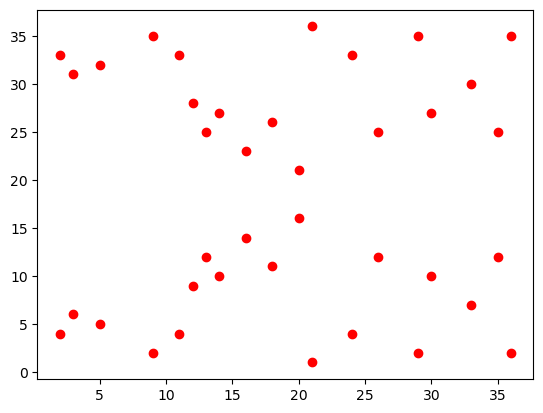

In [9]:
pts = find_points(1, 6, 37)
print(pts)
xcord = [pt[0] for pt in pts]
ycord = [pt[1] for pt in pts]
plt.plot(np.array(xcord), np.array(ycord), 'ro');
print('number of points = ', len(pts))

[(1, 34), (1, 7), (2, 37), (2, 4), (3, 6), (3, 35), (4, 19), (4, 22), (6, 33), (6, 8), (10, 14), (10, 27), (11, 6), (11, 35), (13, 17), (13, 24), (16, 10), (16, 31), (17, 37), (17, 4), (19, 18), (19, 23), (20, 20), (20, 21), (22, 37), (22, 4), (24, 18), (24, 23), (27, 6), (27, 35), (28, 16), (28, 25), (31, 12), (31, 29), (34, 36), (34, 5), (36, 32), (36, 9), (37, 26), (37, 15), (39, 18), (39, 23), (40, 2), (40, 39)]
number of points =  45


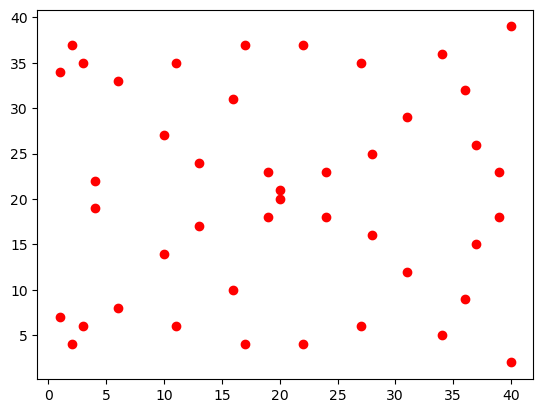

In [16]:
pts = find_points(1, 6, 41)
print(pts)
xcord = [pt[0] for pt in pts]
ycord = [pt[1] for pt in pts]
plt.plot(np.array(xcord), np.array(ycord), 'ro');
print('number of points = ', len(pts)+1)

[(0, 37), (0, 10), (1, 14), (1, 33), (2, 4), (2, 43), (3, 6), (3, 41), (4, 36), (4, 11), (5, 18), (5, 29), (7, 36), (7, 11), (8, 3), (8, 44), (11, 28), (11, 19), (12, 17), (12, 30), (13, 17), (13, 30), (15, 24), (15, 23), (17, 1), (17, 46), (18, 34), (18, 13), (20, 6), (20, 41), (22, 17), (22, 30), (24, 6), (24, 41), (28, 32), (28, 15), (33, 16), (33, 31), (36, 36), (36, 11), (39, 12), (39, 35), (40, 28), (40, 19), (42, 8), (42, 39), (43, 28), (43, 19), (46, 2), (46, 45)]
number of points =  51


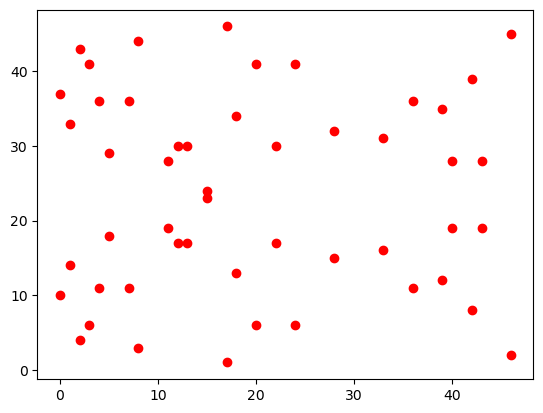

In [18]:
pts = find_points(1, 6, 47)
print(pts)
xcord = [pt[0] for pt in pts]
ycord = [pt[1] for pt in pts]
plt.plot(np.array(xcord), np.array(ycord), 'ro');
print('number of points = ', len(pts)+1)

[(0, 19), (0, 52), (1, 24), (1, 47), (2, 4), (2, 67), (3, 6), (3, 65), (4, 43), (4, 28), (6, 50), (6, 21), (7, 1), (7, 70), (8, 10), (8, 61), (13, 50), (13, 21), (17, 45), (17, 26), (20, 43), (20, 28), (21, 49), (21, 22), (24, 3), (24, 68), (25, 6), (25, 65), (27, 64), (27, 7), (31, 24), (31, 47), (32, 2), (32, 69), (33, 60), (33, 11), (34, 9), (34, 62), (35, 48), (35, 23), (37, 12), (37, 59), (39, 24), (39, 47), (40, 2), (40, 69), (41, 58), (41, 13), (42, 15), (42, 56), (43, 6), (43, 65), (45, 15), (45, 56), (47, 43), (47, 28), (49, 25), (49, 46), (50, 5), (50, 66), (51, 3), (51, 68), (52, 50), (52, 21), (53, 64), (53, 7), (55, 15), (55, 56), (56, 38), (56, 33), (62, 64), (62, 7), (63, 57), (63, 14), (66, 36), (66, 35), (67, 3), (67, 68), (70, 2), (70, 69)]
number of points =  81


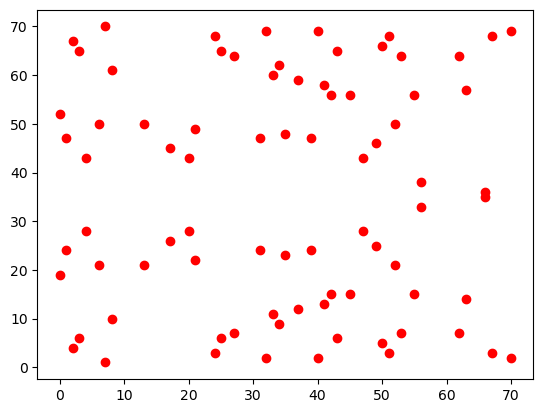

In [19]:
pts = find_points(1, 6, 71)
print(pts)
xcord = [pt[0] for pt in pts]
ycord = [pt[1] for pt in pts]
plt.plot(np.array(xcord), np.array(ycord), 'ro');
print('number of points = ', len(pts))